<a href="https://colab.research.google.com/github/groom115/Image-Restoration-Using-GANS/blob/main/Image_restoration_using_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image restoration using GANS**

#1.Installing All dependencies

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K


#2. Install pre-trained model

In [ ]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
# !wget https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth -P experiments/pretrained_models
# Now we use the V1.3 model for the demo
!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth -P experiments/pretrained_models

/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 431, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 431 (delta 0), reused 4 (delta 0), pack-reused 426
Receiving objects: 100% (431/431), 5.36 MiB | 12.06 MiB/s, done.
Resolving deltas: 100% (214/214), done.
/content/GFPGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 33.1 MB/s 
     |████████████████████████████████| 5.8 MB 50.7 MB/s 
     |████████████████████████████████| 190 kB 15.3 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.5-py3-none-any.whl size=194485 sha256=9ba938c4e24f7410bfcb2f35a781d1deb84ac8c870e13a62c96e7fb862847a3a
  Stored in directory: /root/.cache/pip/wheels/74/1b/d0/8659cf028233dd1e3bf282271009fbf037dfc4ab761f32a032
Successfully built basicsr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/publi

running develop
running egg_info
creating gfpgan.egg-info
writing gfpgan.egg-info/PKG-INFO
writing dependency_links to gfpgan.egg-info/dependency_links.txt
writing requirements to gfpgan.egg-info/requires.txt
writing top-level names to gfpgan.egg-info/top_level.txt
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/gfpgan.egg-link (link to .)
Adding gfpgan 1.3.2 to easy-install.pth file

Installed /content/GFPGAN
Processing dependencies for gfpgan==1.3.2
Searching for yapf==0.32.0
Best match: yapf 0.32.0
Adding yapf 0.32.0 to easy-install.pth file
Installing yapf script to /usr/local/bin
Installing yapf-diff script to /usr/local/bin

Using /usr/local/lib/python3.7/dist-packages
Searching for tqdm==4.64.0
Best match: tqdm 4.64.0
Adding tqdm 4.64.0 to easy-install.pth file
Installing tqdm script to /us

#3.Upload images to test.

In [ ]:
# upload your own images
import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving pexels-suzy-hazelwood-3361073.jpg to pexels-suzy-hazelwood-3361073.jpg
move pexels-suzy-hazelwood-3361073.jpg to inputs/upload/pexels-suzy-hazelwood-3361073.jpg


#4.Restoring images



Now we use the GFPGAN to restore the above low-quality images
We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions

In [ ]:
!rm -rf results
!python inference_gfpgan.py -i inputs/upload -o results -v 1.3 -s 2 --bg_upsampler realesrgan
!ls results/cmp

Processing pexels-suzy-hazelwood-3361073.jpg ...
	Tile 1/42
	Tile 2/42
	Tile 3/42
	Tile 4/42
	Tile 5/42
	Tile 6/42
	Tile 7/42
	Tile 8/42
	Tile 9/42
	Tile 10/42
	Tile 11/42
	Tile 12/42
	Tile 13/42
	Tile 14/42
	Tile 15/42
	Tile 16/42
	Tile 17/42
	Tile 18/42
	Tile 19/42
	Tile 20/42
	Tile 21/42
	Tile 22/42
	Tile 23/42
	Tile 24/42
	Tile 25/42
	Tile 26/42
	Tile 27/42
	Tile 28/42
	Tile 29/42
	Tile 30/42
	Tile 31/42
	Tile 32/42
	Tile 33/42
	Tile 34/42
	Tile 35/42
	Tile 36/42
	Tile 37/42
	Tile 38/42
	Tile 39/42
	Tile 40/42
	Tile 41/42
	Tile 42/42
Results are in the [results] folder.
pexels-suzy-hazelwood-3361073_00.png


Meaning of different terms
-h                   show this help

 -i input             Input image or folder. Default: inputs/whole_imgs

  -o output            Output folder. Default: results

  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3

  -s upscale           The final upsampling scale of the image. Default: 2

 -bg_upsampler        background upsampler. Default: realesrgan

 -bg_tile             Tile size for background sampler, 0 for no tile during 
 testing. Default: 400
 -suffix              Suffix of the restored faces

 -only_center_face    Only restore the center face

 -aligned             Input are aligned faces

 -ext                 Image extension. Options: auto | jpg | png, auto means 
 
 using the same extension as inputs. Default: auto


#5. Visualisation


 We first visualize the cropped faces
The left are the inputs images; the right are the results of GFPGAN

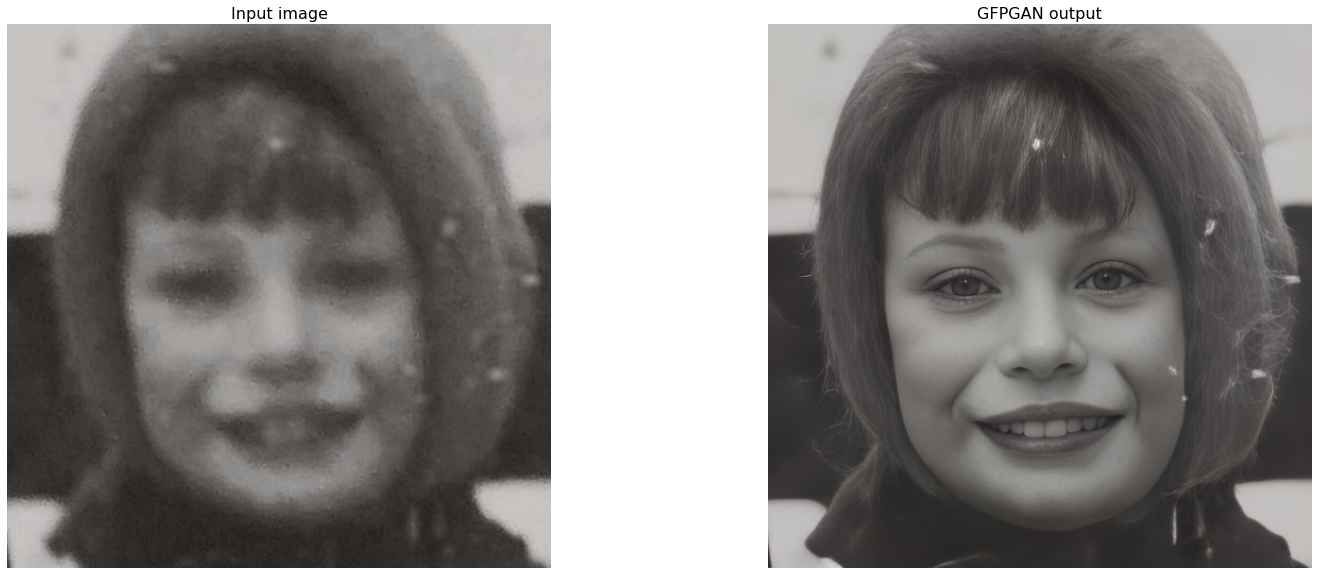

In [ ]:
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'results/cropped_faces'
result_folder = 'results/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)


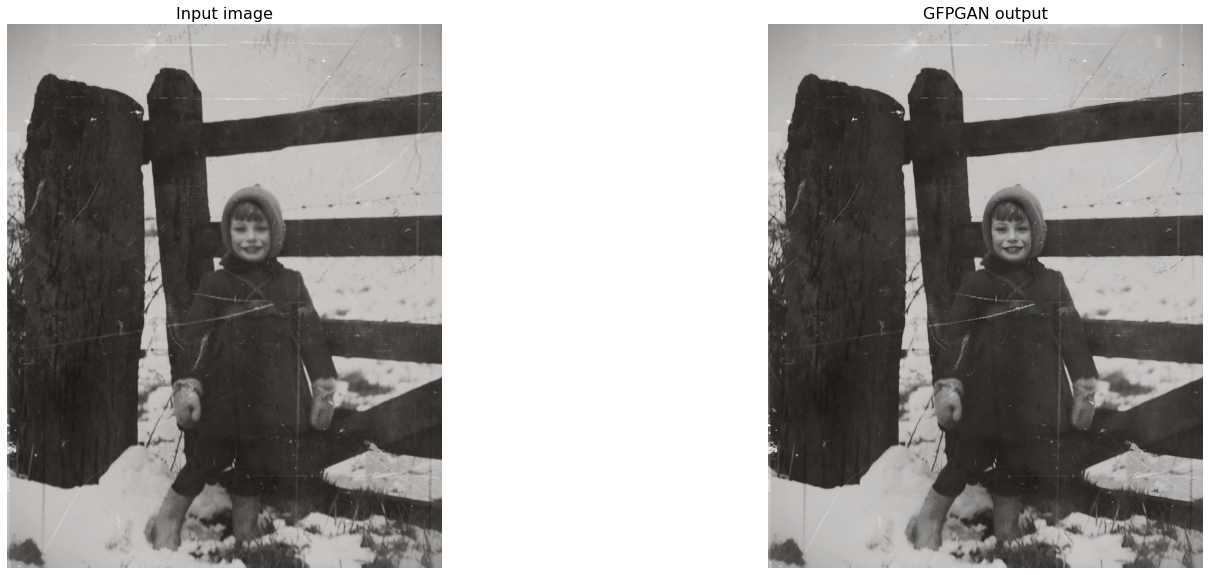

In [ ]:
# We then visualize the whole image
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'inputs/upload'
result_folder = 'results/restored_imgs'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 6.Download results

In [ ]:
# download the result
!ls results
print('Download results')
os.system('zip -r download.zip results')
files.download("download.zip")

cmp  cropped_faces  restored_faces  restored_imgs
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>